## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
df_train=pd.read_excel("Data_Train.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Conversion Type

In [4]:
df_train.Date_of_Journey=pd.to_datetime(df_train.Date_of_Journey)
df_train.Price=df_train.Price.astype('float')
df_train[["Airline","Source","Destination","Total_Stops","Additional_Info"]]=df_train[["Airline","Source","Destination","Total_Stops","Additional_Info"]]\
.astype("category")

In [5]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df_train.dropna(inplace=True)
df_train.reset_index(inplace=True,drop=True)
df_train.shape

(10682, 11)

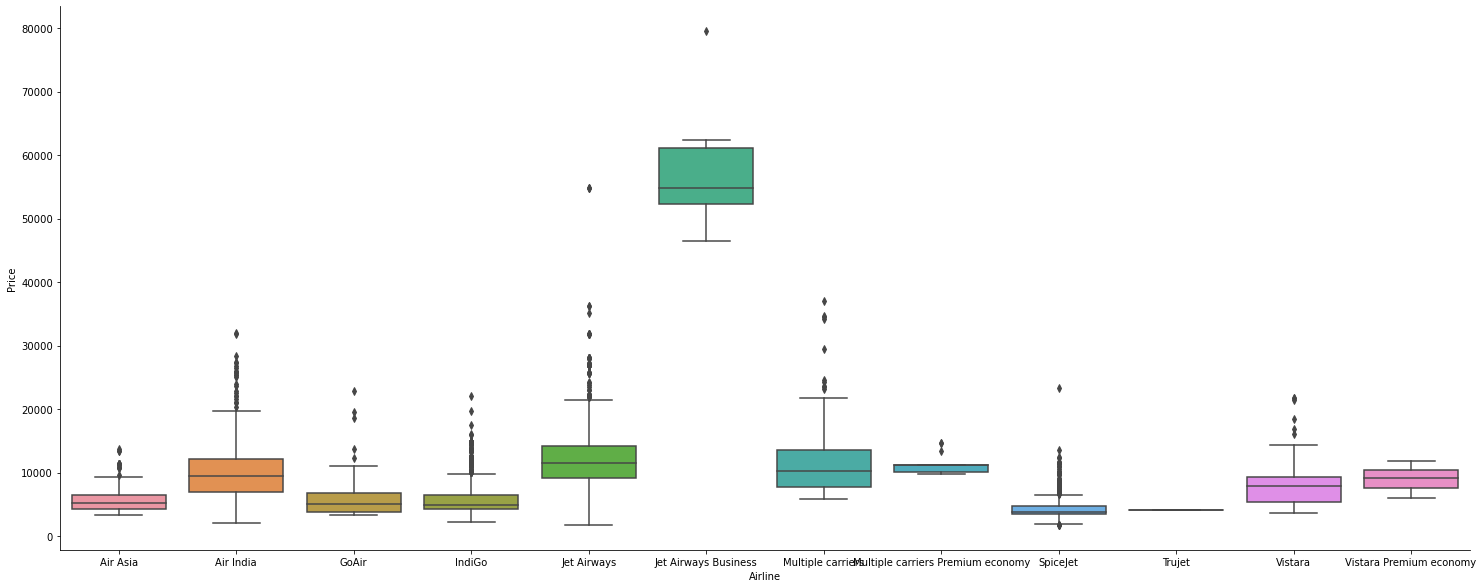

In [7]:
#to see if there is some impact on the price and see if we will use nominal or ordinal conversion
sns.catplot(y="Price", x="Airline",data=df_train,kind="box", height=8.277, aspect=15/6)


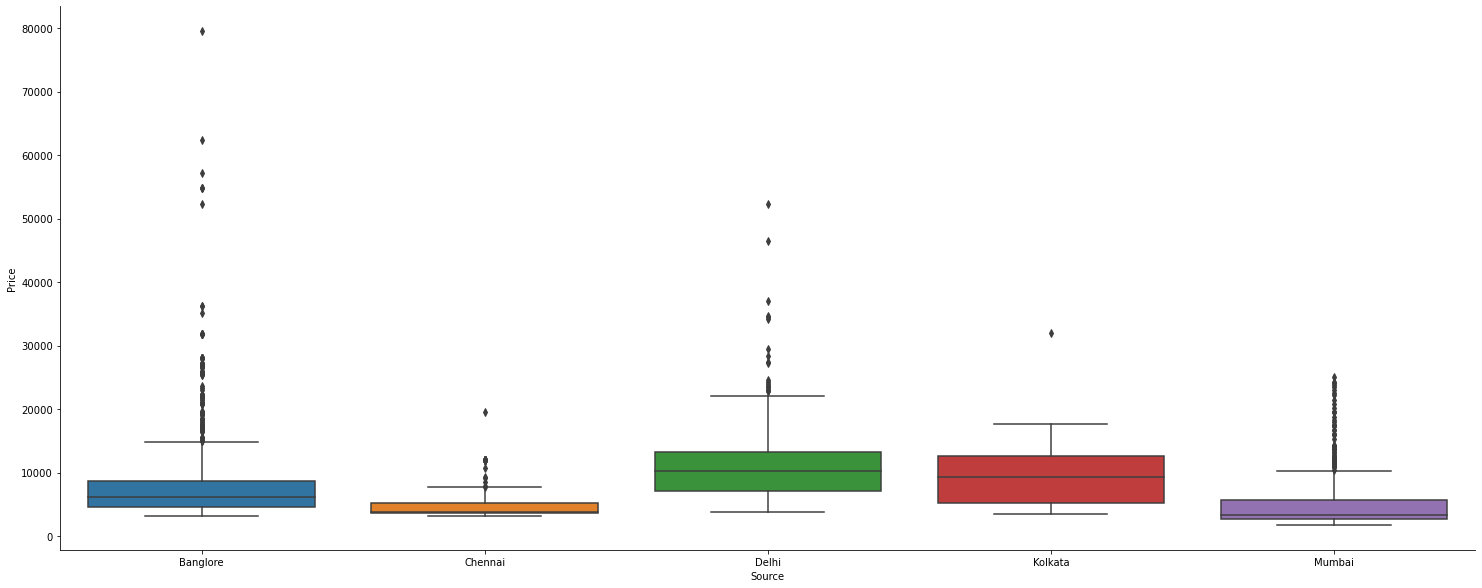

In [8]:
sns.catplot(y="Price", x="Source",data=df_train,kind="box", height=8.277, aspect=15/6)


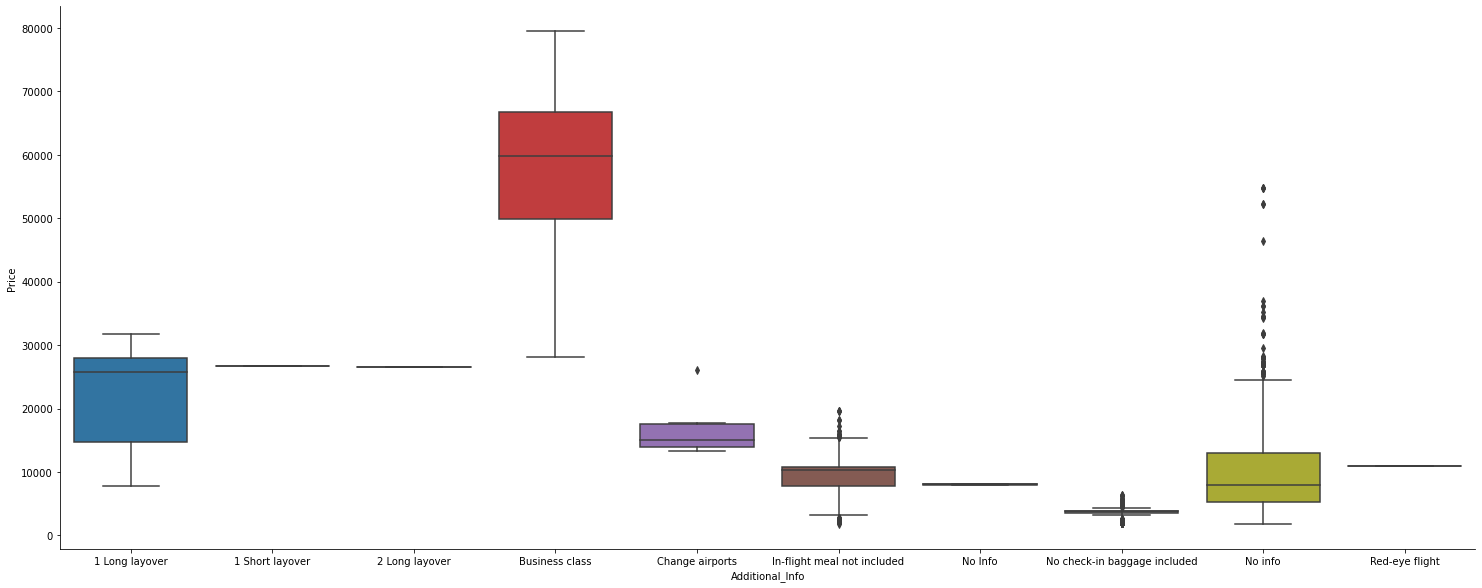

In [9]:
sns.catplot(y="Price",x="Additional_Info", data=df_train, kind="box",height=8.277, aspect=15/6)

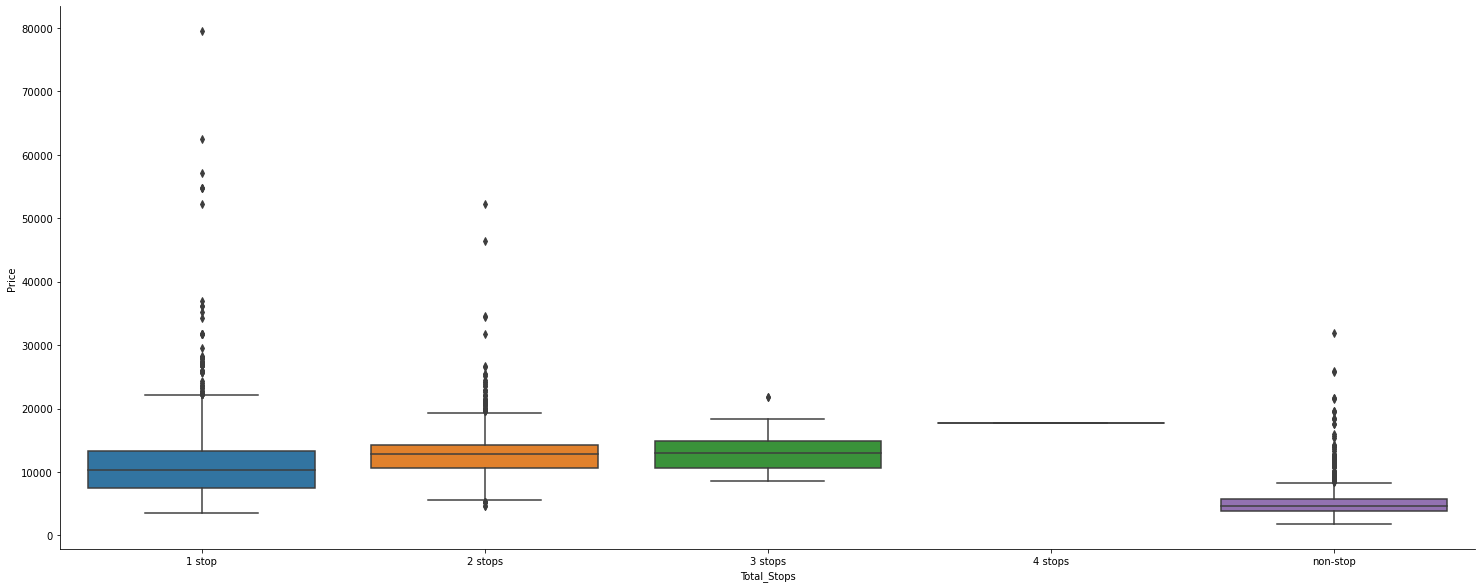

In [10]:
sns.catplot(y="Price",x="Total_Stops", data=df_train, kind="box",height=8.277, aspect=15/6)

In [11]:
# We will drop Route since it's represented by Total_stop
df_train.drop("Route",axis=1,inplace=True)

In [12]:
df_Cat_dummies=pd.get_dummies(df_train,columns=["Airline","Source","Destination","Total_Stops","Additional_Info"],drop_first=True)

In [13]:
df_Cat_dummies.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Price"],axis=1,inplace=True)
df_train.drop(["Airline","Source","Destination","Total_Stops","Additional_Info"],axis=1,inplace=True)

In [14]:
df_train.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Price
0,2019-03-24,22:20,01:10 22 Mar,2h 50m,3897.0
1,2019-01-05,05:50,13:15,7h 25m,7662.0
2,2019-09-06,09:25,04:25 10 Jun,19h,13882.0
3,2019-12-05,18:05,23:30,5h 25m,6218.0
4,2019-01-03,16:50,21:35,4h 45m,13302.0


In [15]:
df_train.Date_of_Journey.dt.year.unique()
# since we have just one year, we will worked only on month and day

array([2019], dtype=int64)

In [16]:
df_train['month_journey']=df_train.Date_of_Journey.dt.month
df_train['day_journey']=df_train.Date_of_Journey.dt.day
df_train.drop("Date_of_Journey",axis=1,inplace=True)
df_train.head(3)

,Dep_Time,Arrival_Time,Duration,Price,month_journey,day_journey
0,22:20,01:10 22 Mar,2h 50m,3897.0,3,24
1,05:50,13:15,7h 25m,7662.0,1,5
2,09:25,04:25 10 Jun,19h,13882.0,9,6


In [17]:
df_train['Dep_hour']=pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Dep_minute']=pd.to_datetime(df_train.Dep_Time).dt.minute
df_train.drop("Dep_Time",axis=1,inplace=True)
df_train.head(3)

,Arrival_Time,Duration,Price,month_journey,day_journey,Dep_hour,Dep_minute
0,01:10 22 Mar,2h 50m,3897.0,3,24,22,20
1,13:15,7h 25m,7662.0,1,5,5,50
2,04:25 10 Jun,19h,13882.0,9,6,9,25


In [18]:
Arrival_hour=pd.to_datetime(df_train.Arrival_Time).dt.hour
Arrival_minute=pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop("Arrival_Time",axis=1,inplace=True)
df_train.head(3)

,Duration,Price,month_journey,day_journey,Dep_hour,Dep_minute
0,2h 50m,3897.0,3,24,22,20
1,7h 25m,7662.0,1,5,5,50
2,19h,13882.0,9,6,9,25


In [19]:
#function to normalize duration column which contains somethimes hour/minute or both  

def duretion(a):
    if len(a.split())!=2:
        if "h" in a:
            a=a+' 0m'
        else:
            a='0h ' +a
    return (a)

In [20]:
df_train['Duration']=df_train["Duration"].apply(lambda x:duretion(x))

In [21]:
df_train.head()

,Duration,Price,month_journey,day_journey,Dep_hour,Dep_minute
0,2h 50m,3897.0,3,24,22,20
1,7h 25m,7662.0,1,5,5,50
2,19h 0m,13882.0,9,6,9,25
3,5h 25m,6218.0,12,5,18,5
4,4h 45m,13302.0,1,3,16,50


In [22]:
## add two columns from Duration (Duration_hour & Duration_minute)
Duration_hour=[]
Duration_minute=[]
for i in np.arange(len(df_train.Duration)):
    Duration_hour.append(df_train.Duration[i].split("h")[0].strip().split(" ")[0])
    Duration_minute.append(df_train.Duration[i].split("h")[1].strip().split("m")[0])
df_train["Duration_hour"]=Duration_hour
df_train["Duration_minute"]=Duration_minute

In [23]:
df_train.drop("Duration",axis=1,inplace=True)

In [24]:
df_train.head()

,Price,month_journey,day_journey,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,3897.0,3,24,22,20,2,50
1,7662.0,1,5,5,50,7,25
2,13882.0,9,6,9,25,19,0
3,6218.0,12,5,18,5,5,25
4,13302.0,1,3,16,50,4,45


In [25]:
print(df_train.shape, df_Cat_dummies.shape )

(10682, 7) (10682, 33)


In [26]:
df_train=pd.concat([df_train,df_Cat_dummies],axis=1)


In [27]:
#to see all columns
pd.set_option('display.max_columns', 500)


In [28]:
df_train.head(3)

,Price,month_journey,day_journey,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897.0,3,24,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,7662.0,1,5,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,13882.0,9,6,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### Model and prediction

In [29]:
from sklearn.model_selection  import train_test_split,GridSearchCV,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor

In [30]:
x=df_train.iloc[:,1:]
y=df_train.Price

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)

#### without Tuning Parameter

In [32]:
model=DecisionTreeRegressor()

In [33]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
y_pred=model.predict(X_test)

In [35]:
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r score: ",r2_score(y_test,y_pred))

MAE:  768.8484479800343
MSE:  2906448.6897343113
RMSE:  1704.8309856799035
r score:  0.8662098871705334


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


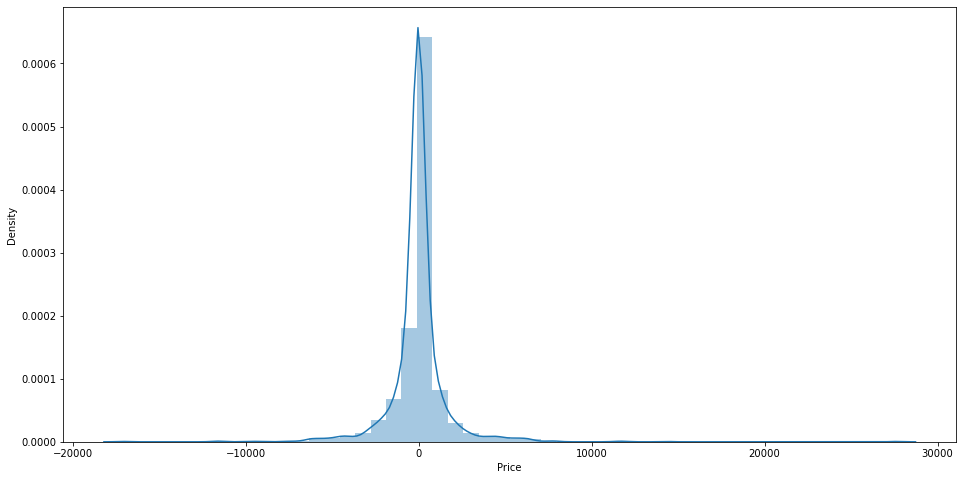

In [36]:
fig=plt.figure(figsize=(16,8))
sns.distplot(y_test-y_pred)

#### Hyperparameter Tuning
Choose following method for hyperparameter tuning
* GridSearchCV or RandomizedSearchCV 

1. Assign hyperparameters in form of dictionery 
2. Fit the model
3. Check best paramters and best score

In [37]:
np.arange(1,100,4)

array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65,
       69, 73, 77, 81, 85, 89, 93, 97])

In [38]:

param_grid={
    "max_depth":np.arange(1,100,4),
    "min_samples_split":np.arange(2,50),
    "max_features":["auto", "sqrt", "log2"]
    
}
gridcv=GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,n_jobs=2,cv=2)

In [39]:
gridcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=2,
             param_grid={'max_depth': array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65,
       69, 73, 77, 81, 85, 89, 93, 97]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [40]:
gridcv.best_estimator_

DecisionTreeRegressor(max_depth=21, max_features='auto', min_samples_split=8)

In [41]:
gridcv.best_params_

{'max_depth': 21, 'max_features': 'auto', 'min_samples_split': 8}

In [42]:
y_grid_pred=gridcv.predict(X_test)

In [43]:
print("MAE: ",mean_absolute_error(y_test,y_grid_pred))
print("MSE: ",mean_squared_error(y_test,y_grid_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_grid_pred)))
print("r score:",r2_score(y_test,y_grid_pred))

MAE:  770.3438735328165
MSE:  2395670.963642627
RMSE:  1547.7955173867856
r score: 0.8897220894832574


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


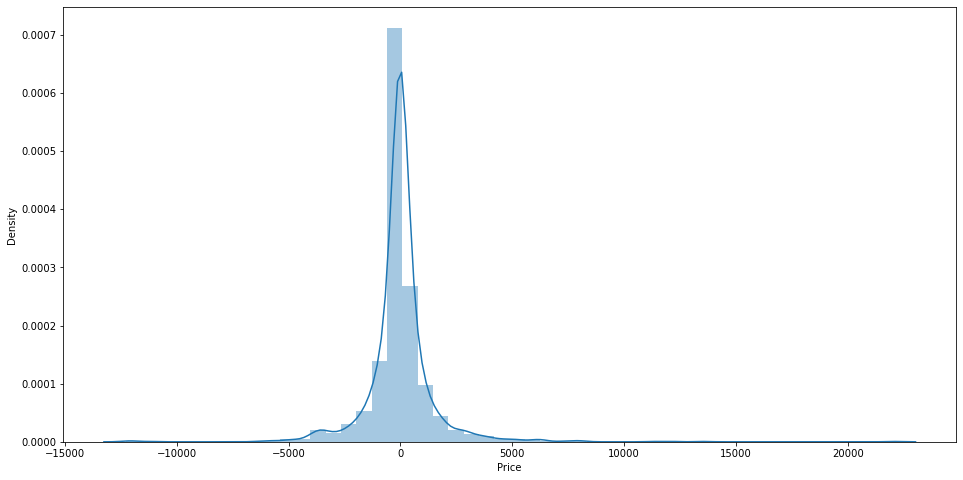

In [44]:
fig=plt.figure(figsize=(16,8))
sns.distplot(y_test-y_grid_pred)